In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.feature_selection import mutual_info_classif

In [3]:
data = pd.read_csv("za_klasifikaciju.csv")

In [4]:
del data['Participant_id']

In [5]:
def read_feats(dir, n_patients):

    for i in range(1, n_patients):
        filename = "s{:02d}_{}.csv".format(i, (dir.split('_')[0]).lower())

        features_i = pd.read_csv(os.path.join(dir, filename), index_col=0)

        if i == 1:
            features = features_i.copy()
        else:
            features = features.append(features_i, ignore_index=True)
    
    return features

In [6]:
def get_mi(features, data, type_, feat_name):
    """
    INPUT
    ------
    features -> all features for one modality and one participant
    data -> classifiaction labels for all participants
    type_ -> str in ['Valence', 'Arousal', 'Dominance', 'Liking']
    feat_name -> name of modality

    RETURNS
    ------
    dict of feature names and their mutual info scores
    """

    #data_p = data.query("Participant_id == {}".format(p_id)).copy()

    if type_ == 'Valence':
        y = data['Valence'].copy()
    elif type_ == 'Arousal':
        y = data['Arousal'].copy()
    elif type_ == 'Dominance':
        y = data['Dominance'].copy()
    elif type_ == 'Liking':
        y = data['Liking'].copy()

    # Binary classification, 1-high, 0-low
    y[y < 4.5] = 0
    y[y >= 4.5] = 1

    try:
        m_i = mutual_info_classif(features, y)
    except ValueError:
        m_i = mutual_info_classif(features.fillna(0), y)

    #labels = np.array(list(features))

    #inds = np.argsort(m_i)
    #m_i = m_i[inds]
    #labels = labels[inds]

    #return {'name': feat_name, 'labels': labels, 'm_info': m_i}
    return m_i

In [7]:
plt.style.use('fivethirtyeight')
plt.rc('font', size=10)

In [8]:
N_PATIENTS = 33

# GSR

In [9]:
GSR_DIR = 'gsr_features/'

In [10]:
features = read_feats(GSR_DIR, N_PATIENTS)

In [11]:
mi_gsr = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_gsr += [get_mi(features, data, t, 'GSR')]

In [12]:
f_names_gsr = ['GSR-'+x for x in list(features)]
#f_names_gsr = ['GSR' for x in list(features)]

# HRV

In [13]:
HRV_DIR = 'hrv_features/'

In [14]:
features = read_feats(HRV_DIR, N_PATIENTS)

In [15]:
mi_hrv = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_hrv += [get_mi(features, data, t, 'HRV')]
        

In [16]:
f_names_hrv = ['HRV-'+x for x in list(features)]
#f_names_hrv = ['HRV' for x in list(features)]

# RESP

In [17]:
RESP_DIR = 'resp_features/'

In [18]:
features = read_feats(RESP_DIR, N_PATIENTS)

In [19]:
mi_resp = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_resp += [get_mi(features, data, t, 'RESP')]

In [20]:
f_names_resp = ['RESP-'+x for x in list(features)]
#f_names_resp = ['RESP' for x in list(features)]

# TEMG

In [21]:
TEMG_DIR = 'temg_features/'

In [22]:
features = read_feats(TEMG_DIR, N_PATIENTS)

In [23]:
mi_temg = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_temg += [get_mi(features, data, t, 'TEMG')]

In [24]:
f_names_temg = ['TEMG-'+x for x in list(features)]
#f_names_temg = ['TEMG' for x in list(features)]

# TEMP

In [25]:
TEMP_DIR = 'temp_features/'

In [26]:
features = read_feats(TEMP_DIR, N_PATIENTS)

In [27]:
mi_temp = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_temp += [get_mi(features, data, t, 'TEMP')]

In [28]:
f_names_temp = ['TEMP-'+x for x in list(features)]
#f_names_temp = ['TEMP' for x in list(features)]

# ZEMG

In [29]:
ZEMG_DIR = 'zemg_features/'

In [30]:
features = read_feats(ZEMG_DIR, N_PATIENTS)

In [31]:
mi_zemg = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_zemg += [get_mi(features, data, t, 'ZEMG')]

In [32]:
f_names_zemg = ['ZEMG-'+x for x in list(features)]
#f_names_zemg = ['ZEMG' for x in list(features)]

# EEG

In [33]:
EEG_DIR = 'eeg_features/'
electrodes = os.listdir(EEG_DIR)

In [34]:
f_names_eeg = []

In [35]:
mi_eeg = []

for e in electrodes:

    for i in range(1, 33):

        filename = "s{:02d}_eegfeatures.csv".format(i)

        features_i = pd.read_csv(os.path.join(EEG_DIR, e, filename), index_col=0)

        if i == 1:
            features = features_i.copy()
        else:
            features = features.append(features_i, ignore_index=True)
    mi_e = []
    for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
        mi_e += [get_mi(features, data, t, e)]
    
    mi_eeg += [mi_e]

    f_names_electrode = [e+'-'+x for x in list(features)]
    #f_names_electrode = [e for x in list(features)]
    f_names_eeg += f_names_electrode

# Comparison

In [36]:
f_names = f_names_gsr + f_names_resp + f_names_temg + f_names_temp + f_names_zemg + f_names_eeg

In [37]:
mi = [mi_gsr, mi_resp, mi_temg, mi_temp, mi_zemg]

mi += mi_eeg

In [44]:
valence = []
arousal = []
dominance = []
liking = []
val_feats = []
ar_feats = []
dom_feats = []
lik_feats = []

for i in range(len(mi)):
    valence += list(mi[i][0])
    arousal += list(mi[i][1])
    dominance += list(mi[i][2])
    liking += list(mi[i][3])

In [45]:
valence = np.array(valence)
arousal = np.array(arousal)
dominance = np.array(dominance)
liking = np.array(liking)
f_names = np.array(f_names)

In [46]:
ind_v = np.argsort(valence)
valence = valence[ind_v]
names_v = f_names[ind_v]

ind_a = np.argsort(arousal)
arousal = arousal[ind_a]
names_a = f_names[ind_a]

ind_d = np.argsort(dominance)
dominance = dominance[ind_d]
names_d = f_names[ind_d]

ind_l = np.argsort(liking)
liking = liking[ind_l]
names_l = f_names[ind_l]

In [47]:
valence = valence[-200:]
names_v = names_v[-200:]

arousal = arousal[-200:]
names_a = names_a[-200:]

dominance = dominance[-200:]
names_d = names_d[-200:]

liking = liking[-200:]
names_l = names_l[-200:]

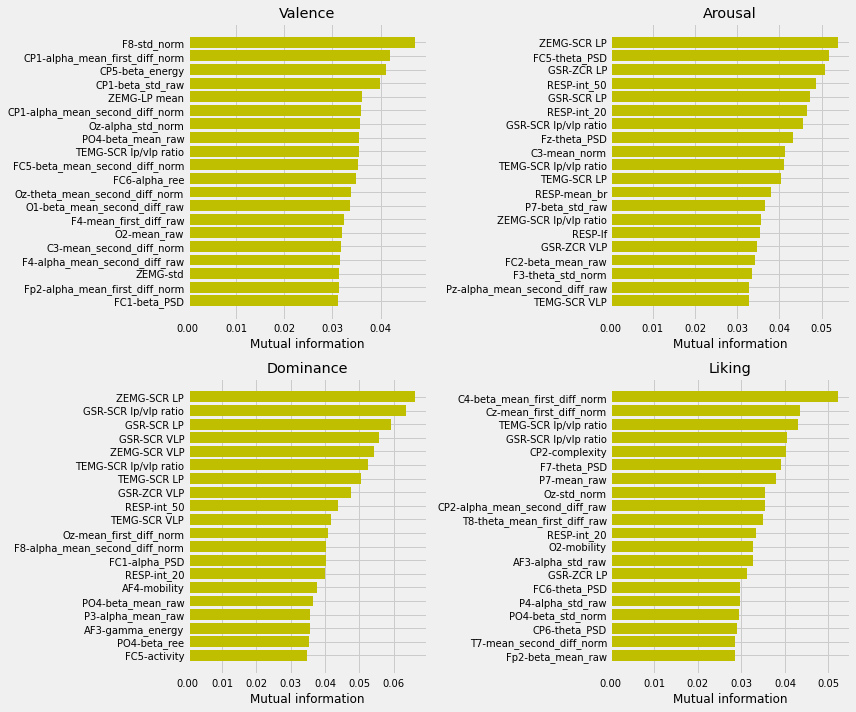

In [43]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.barh(names_v[-20:], valence[-20:], color='y')
plt.title('Valence')
plt.xlabel('Mutual information')

plt.subplot(2, 2, 2)
plt.barh(names_a[-20:], arousal[-20:], color='y')
plt.title('Arousal')
plt.xlabel('Mutual information')

plt.subplot(2, 2, 3)
plt.barh(names_d[-20:], dominance[-20:], color='y')
plt.title('Dominance')
plt.xlabel('Mutual information')

plt.subplot(2, 2, 4)
plt.barh(names_l[-20:], liking[-20:], color='y')
plt.title('Liking')
plt.xlabel('Mutual information')

plt.tight_layout()

plt.show()

## Saving best features

In [48]:
valence_final = pd.DataFrame()
arousal_final = pd.DataFrame()
dominance_final = pd.DataFrame()
liking_final = pd.DataFrame()

In [62]:
def get_feats(type_, names):

    feats = []
    for f in names:
        if f.split('-')[0] == type_:
            feats += [f.split('-', 1)[1]]

    return feats

### <i> GSR </i>

In [63]:
# Valence
gsr_feats_val = get_feats('GSR', names_v)

# Arousal
gsr_feats_ar = get_feats('GSR', names_a)

# Dominance
gsr_feats_dom = get_feats('GSR', names_d)

# Liking
gsr_feats_lik = get_feats('GSR', names_l)

In [64]:
features = read_feats(GSR_DIR, N_PATIENTS)

In [65]:
valence_final = pd.concat([valence_final, features[gsr_feats_val]], axis=1)
arousal_final = pd.concat([arousal_final, features[gsr_feats_ar]], axis=1)
dominance_final = pd.concat([dominance_final, features[gsr_feats_dom]], axis=1)
liking_final = pd.concat([liking_final, features[gsr_feats_lik]], axis=1)

### <i> HRV </i>

In [66]:
# Valence
hrv_feats_val = get_feats('HRV', names_v)

# Arousal
hrv_feats_ar = get_feats('HRV', names_a)

# Dominance
hrv_feats_dom = get_feats('HRV', names_d)

# Liking
hrv_feats_lik = get_feats('HRV', names_l)

In [67]:
features = read_feats(HRV_DIR, N_PATIENTS)

In [68]:
valence_final = pd.concat([valence_final, features[hrv_feats_val]], axis=1)
arousal_final = pd.concat([arousal_final, features[hrv_feats_ar]], axis=1)
dominance_final = pd.concat([dominance_final, features[hrv_feats_dom]], axis=1)
liking_final = pd.concat([liking_final, features[hrv_feats_lik]], axis=1)

### <i> RESP </i>

In [69]:
# Valence
resp_feats_val = get_feats('RESP', names_v)

# Arousal
resp_feats_ar = get_feats('RESP', names_a)

# Dominance
resp_feats_dom = get_feats('RESP', names_d)

# Liking
resp_feats_lik = get_feats('RESP', names_l)

In [70]:
features = read_feats(RESP_DIR, N_PATIENTS)

In [71]:
valence_final = pd.concat([valence_final, features[resp_feats_val]], axis=1)
arousal_final = pd.concat([arousal_final, features[resp_feats_ar]], axis=1)
dominance_final = pd.concat([dominance_final, features[resp_feats_dom]], axis=1)
liking_final = pd.concat([liking_final, features[resp_feats_lik]], axis=1)

### <i> TEMG </i>

In [72]:
# Valence
temg_feats_val = get_feats('TEMG', names_v)

# Arousal
temg_feats_ar = get_feats('TEMG', names_a)

# Dominance
temg_feats_dom = get_feats('TEMG', names_d)

# Liking
temg_feats_lik = get_feats('TEMG', names_l)

In [73]:
features = read_feats(TEMG_DIR, N_PATIENTS)

In [74]:
valence_final = pd.concat([valence_final, features[temg_feats_val]], axis=1)
arousal_final = pd.concat([arousal_final, features[temg_feats_ar]], axis=1)
dominance_final = pd.concat([dominance_final, features[temg_feats_dom]], axis=1)
liking_final = pd.concat([liking_final, features[temg_feats_lik]], axis=1)

### <i> TEMP </i>

In [75]:
# Valence
temp_feats_val = get_feats('TEMP', names_v)

# Arousal
temp_feats_ar = get_feats('TEMP', names_a)

# Dominance
temp_feats_dom = get_feats('TEMP', names_d)

# Liking
temp_feats_lik = get_feats('TEMP', names_l)

In [76]:
features = read_feats(TEMP_DIR, N_PATIENTS)

In [77]:
valence_final = pd.concat([valence_final, features[temp_feats_val]], axis=1)
arousal_final = pd.concat([arousal_final, features[temp_feats_ar]], axis=1)
dominance_final = pd.concat([dominance_final, features[temp_feats_dom]], axis=1)
liking_final = pd.concat([liking_final, features[temp_feats_lik]], axis=1)

### <i> EEG </i>

In [78]:
for e in electrodes:
    # Valence
    eeg_feats_val = get_feats(e, names_v)

    # Arousal
    eeg_feats_ar = get_feats(e, names_a)

    # Dominance
    eeg_feats_dom = get_feats(e, names_d)

    # Liking
    eeg_feats_lik = get_feats(e, names_l)

    for i in range(1, 33):

        filename = "s{:02d}_eegfeatures.csv".format(i)

        features_i = pd.read_csv(os.path.join(EEG_DIR, e, filename), index_col=0)

        if i == 1:
            features = features_i.copy()
        else:
            features = features.append(features_i, ignore_index=True)

    valence_final = pd.concat([valence_final, features[eeg_feats_val]], axis=1)
    arousal_final = pd.concat([arousal_final, features[eeg_feats_ar]], axis=1)
    dominance_final = pd.concat([dominance_final, features[eeg_feats_dom]], axis=1)
    liking_final = pd.concat([liking_final, features[eeg_feats_lik]], axis=1)

### Saving

In [79]:
valence_final.to_csv('valence_features_200.csv')
arousal_final.to_csv('arousal_features_200.csv')
dominance_final.to_csv('dominance_features_200.csv')
liking_final.to_csv('liking_features_200.csv')